# All Scripts Needed to Run This Repository for My Project are Present in This notebook.
# Working Hypothesis
Using a large diverse premade dataset in domain A that is made for the purpose of generalizing natural/natural like images of human faces instead of a costume dataset I collected myself (hance the lack of a data collection script) whilst using a relatively comparable in scale dataset in domain B (the one I want to generate from A)  in cycleGAN .
Repository is a clone of the https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix repository


# Exploration of the datasets

# ArcaneFaces
A handcrafted high-quality dataset of over 3400 faces from the first season of the Arcane TV show. This is my domain B, the domain i want to transfer natural faces to.

https://www.kaggle.com/datasets/artermiloff/arcanefaces

This dataset contains 3414 images hand captured from the first season of Arcane and the music video Enemy by Imagine Dragons.

# Important notes:

- This dataset contains lots of characters, however, it is obviously heavily imbalanced towards   the main characters, that make up an overwhelming majority of the images.
- Lots of neighboring images in this dataset are extremely similar, since they were captured      from neighboring frames.



In [6]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def display_random_images(dataset_path, num_random_images=10):
    """
    Prints the filenames of a specified number of random images
    from the dataset and displays them within the notebook.

    Args:
        dataset_path (str): The path to the directory containing the images.
        num_random_images (int): The number of random images to display.
    """
    image_files = [f for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f)) and
                   f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    if not image_files:
        print(f"No image files found in the specified path: {dataset_path}")
        return

    print(f"Found {len(image_files)} image files in: {dataset_path}")

    if len(image_files) >= num_random_images:
        random_image_files = random.sample(image_files, num_random_images)
    else:
        random_image_files = image_files

    print("\n--- Random Images from Dataset ---")
    fig, axes = plt.subplots(1, len(random_image_files), figsize=(15, 5)) # Adjust figsize as needed
    axes = axes.flatten() # For easier indexing if only one image

    for i, img_file in enumerate(random_image_files):
        img_path = os.path.join(dataset_path, img_file)
        try:
            img = Image.open(img_path)
            axes[i].imshow(img)
            axes[i].set_title(img_file)
            axes[i].axis('off') # Turn off axis labels and ticks
            print(f"Displayed: {img_file}")
        except Exception as e:
            print(f"Error loading or displaying image: {img_file} - {e}")

    plt.tight_layout()
    plt.show()

Found 3414 image files in: ./my_dataset/trainB/

--- Random Images from Dataset ---
Displayed: arcane_2377.png
Displayed: arcane_0621.png
Displayed: arcane_1019.png
Displayed: arcane_2372.png
Displayed: arcane_1498.png
Displayed: arcane_2841.png
Displayed: arcane_0766.png
Displayed: arcane_1746.png
Displayed: arcane_0430.png
Displayed: arcane_1038.png


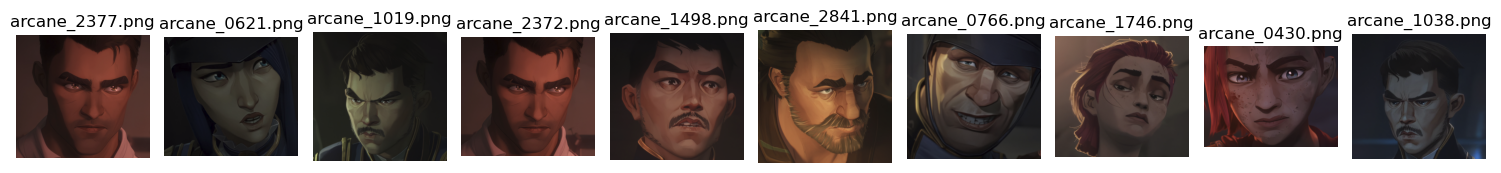

In [7]:

display_random_images("./my_dataset/trainB/")

# Human Faces
A web scraped dataset of human faces suggested for image processing models.

https://www.kaggle.com/datasets/ashwingupta3012/human-faces

# Context
A collection of 7.2k+ images useful for multiple use cases such image identifiers, classifier algorithms etc.

# Content
A thorough mix of all common creeds, races, age groups and profiles in an attempt to create a unbiased dataset with a few GAN generated images as well to aid the functionality of differentiating between real and generated faces.

# I used this dataset as domain A as it is a generalizer of natural/natural-like human images. And in practice it lead to better results then using images of mysel

Found 7219 image files in: ./my_dataset/trainA/

--- Random Images from Dataset ---
Displayed: 1 (5621).jpg
Displayed: 1 (1096).jpg
Displayed: 1 (1355).jpg
Displayed: 1 (4795).jpg
Displayed: 1 (4797).jpg
Displayed: 1 (3827).jpg
Displayed: 1 (1580).jpg
Displayed: 1 (1148).jpg
Displayed: 1 (6638).jpg
Displayed: 1 (5592).jpg


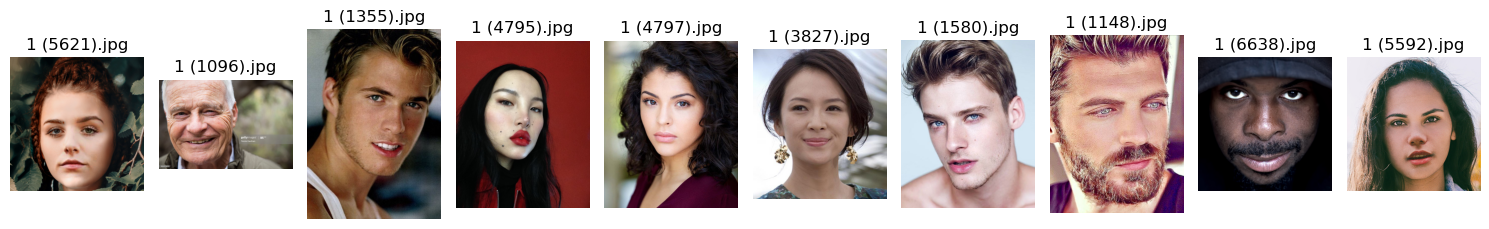

In [8]:

display_random_images("./my_dataset/trainA/")

# Training



In [1]:
!python train.py --dataroot ./my_dataset --name human2arcane --batch_size 4 --model cycle_gan --display_id 0

----------------- Options ---------------
               batch_size: 4                             	[default: 1]
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./my_dataset                  	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 0                             	[default: 1]
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest             

C:\Users\omerd\anaconda3\Lib\site-packages\torch\optim\lr_scheduler.py:182: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn(
C:\Users\omerd\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
C:\Users\omerd\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
C:\Users\omerd\anaconda3\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA imag


(epoch: 17, iters: 980, time: 0.077, data: 0.002) D_A: 0.213 G_A: 0.293 cycle_A: 1.695 idt_A: 0.661 D_B: 0.190 G_B: 0.647 cycle_B: 1.306 idt_B: 0.615 
(epoch: 17, iters: 1080, time: 0.079, data: 0.006) D_A: 0.258 G_A: 0.341 cycle_A: 0.949 idt_A: 0.473 D_B: 0.146 G_B: 0.507 cycle_B: 1.275 idt_B: 0.438 
(epoch: 17, iters: 1180, time: 0.079, data: 0.001) D_A: 0.276 G_A: 0.310 cycle_A: 0.979 idt_A: 0.311 D_B: 0.129 G_B: 0.306 cycle_B: 0.605 idt_B: 0.421 
(epoch: 17, iters: 1280, time: 0.076, data: 0.001) D_A: 0.184 G_A: 0.244 cycle_A: 0.727 idt_A: 0.392 D_B: 0.133 G_B: 0.347 cycle_B: 0.954 idt_B: 0.394 
(epoch: 17, iters: 1380, time: 0.075, data: 0.000) D_A: 0.235 G_A: 0.240 cycle_A: 1.270 idt_A: 0.363 D_B: 0.105 G_B: 0.794 cycle_B: 0.633 idt_B: 0.491 
(epoch: 17, iters: 1480, time: 0.078, data: 0.001) D_A: 0.250 G_A: 0.264 cycle_A: 1.197 idt_A: 0.492 D_B: 0.150 G_B: 0.255 cycle_B: 0.893 idt_B: 0.462 
(epoch: 17, iters: 1580, time: 0.079, data: 0.001) D_A: 0.253 G_A: 0.287 cycle_A: 1.178 

# Analysis

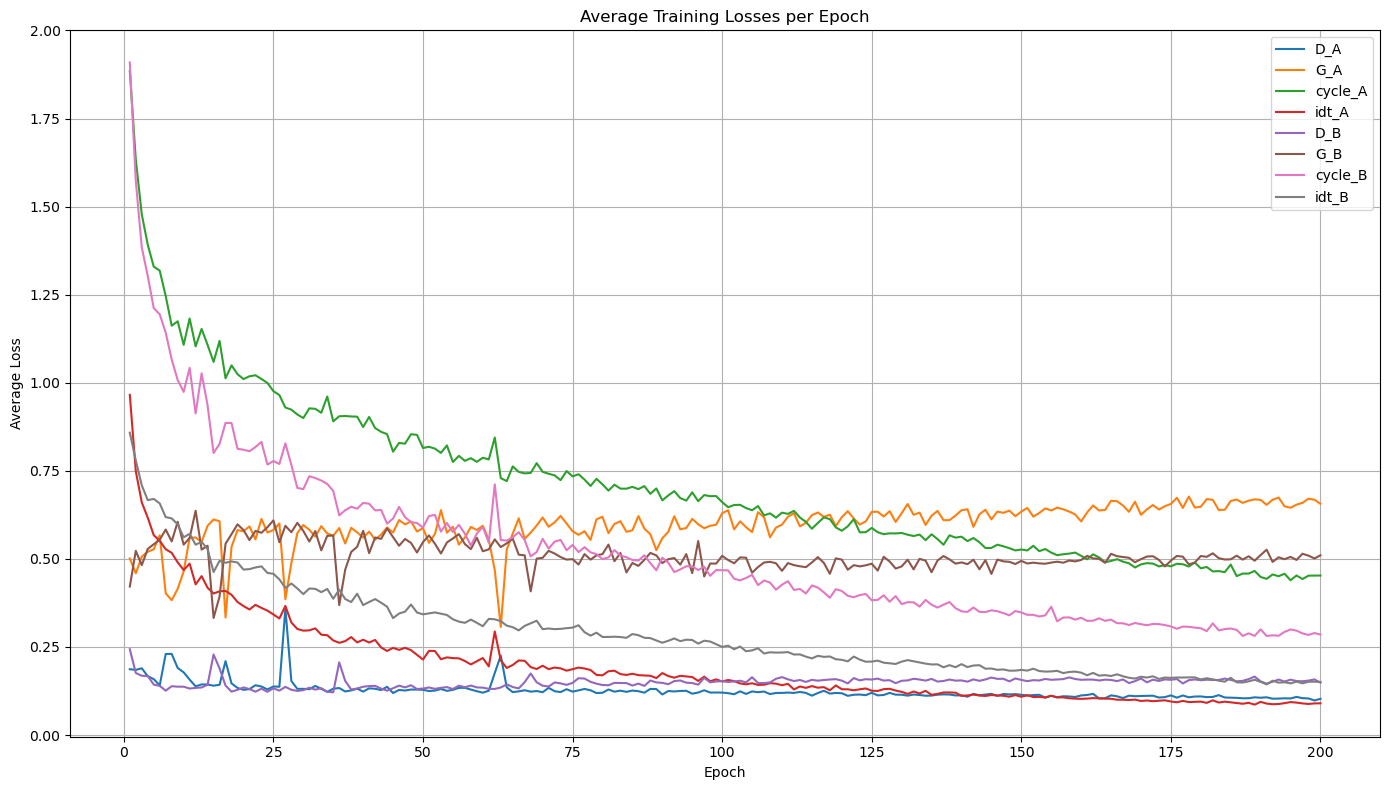

In [1]:
import re
import matplotlib.pyplot as plt
from collections import defaultdict

# Path to your log file
log_file = './checkpoints/human2arcane/loss_log.txt'

epoch_losses = defaultdict(lambda: defaultdict(list))

# Regular expression to extract values
pattern = re.compile(
    r'epoch:\s*(\d+),.*?D_A:\s*([\d.]+)\s*G_A:\s*([\d.]+)\s*cycle_A:\s*([\d.]+)\s*idt_A:\s*([\d.]+)\s*'
    r'D_B:\s*([\d.]+)\s*G_B:\s*([\d.]+)\s*cycle_B:\s*([\d.]+)\s*idt_B:\s*([\d.]+)'
)

# Parse the file
with open(log_file, 'r') as f:
    for line in f:
        match = pattern.search(line)
        if match:
            epoch = int(match.group(1))
            keys = ['D_A', 'G_A', 'cycle_A', 'idt_A', 'D_B', 'G_B', 'cycle_B', 'idt_B']
            for i, key in enumerate(keys):
                epoch_losses[epoch][key].append(float(match.group(i + 2)))

# Average losses per epoch
averaged_losses = defaultdict(list)
epochs = sorted(epoch_losses.keys())

for epoch in epochs:
    for key in epoch_losses[epoch]:
        avg = sum(epoch_losses[epoch][key]) / len(epoch_losses[epoch][key])
        averaged_losses[key].append(avg)

# Plotting
plt.figure(figsize=(14, 8))
for key, values in averaged_losses.items():
    plt.plot(epochs, values, label=key)

plt.title('Average Training Losses per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Average Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('loss_plot_per_epoch.png')
plt.show()

# Testing



A test of 10 images that are completly novel to the model and were not included in the trainind dataset script is set up to take the first face it sees and put it throuh the model some pictures include multipule faces only 1 is supposed to be converted. To detect the face I used MTCNN from facenet_pytorch

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./my_dataset                  	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: 200                           	[default: latest]
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0          

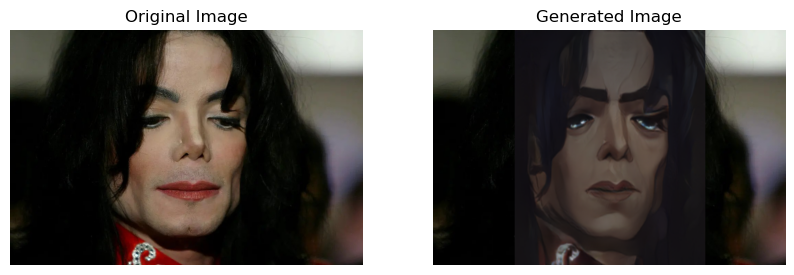

Saved translated image: ./10imgtest/output/546e67f4cbd29c2e043c01ec90dc8733.jpg


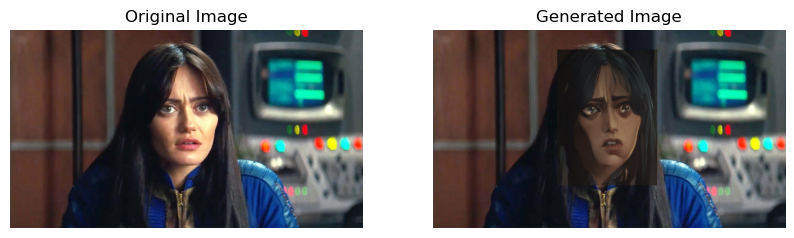

Saved translated image: ./10imgtest/output/elle-black-panther-chadwick-boseman-1519829174.jpg


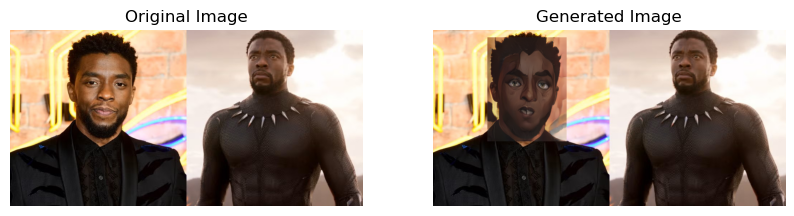

Saved translated image: ./10imgtest/output/elle-black-panther-danai-gurira-1519743776.jpg


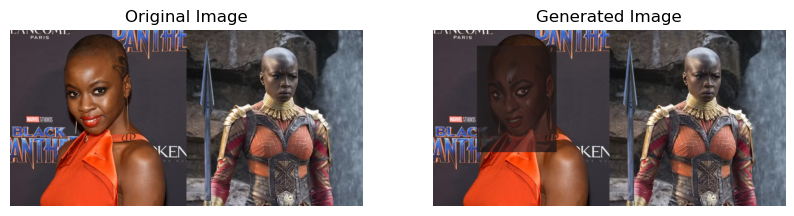

Saved translated image: ./10imgtest/output/GjCJsxpWUAEHgcR.jpg


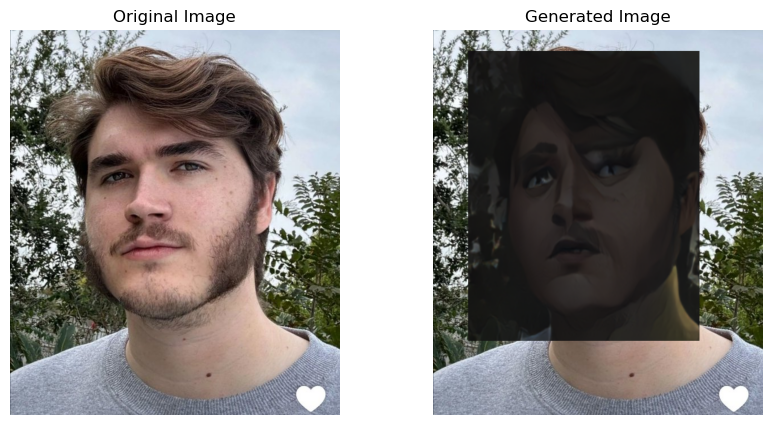

Saved translated image: ./10imgtest/output/lupita-getty-blackpanther5a84c42c47f04-1519773725.jpg


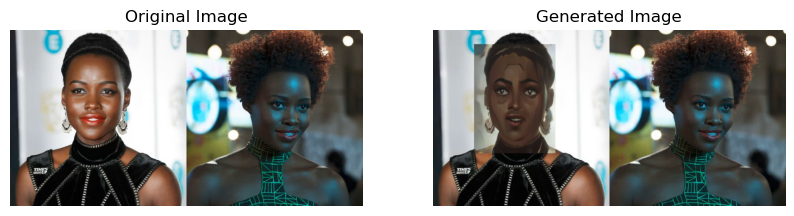

Saved translated image: ./10imgtest/output/Mulan-Live-Action-Remake.jpg


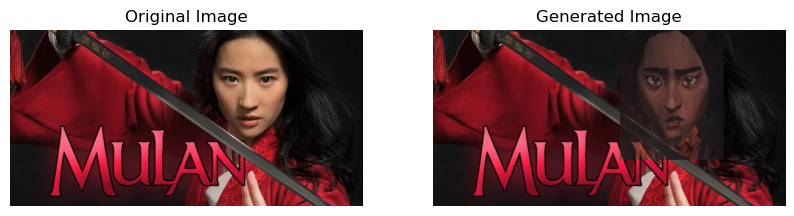

Saved translated image: ./10imgtest/output/pewdiepie_gettyimages-501661286.jpg


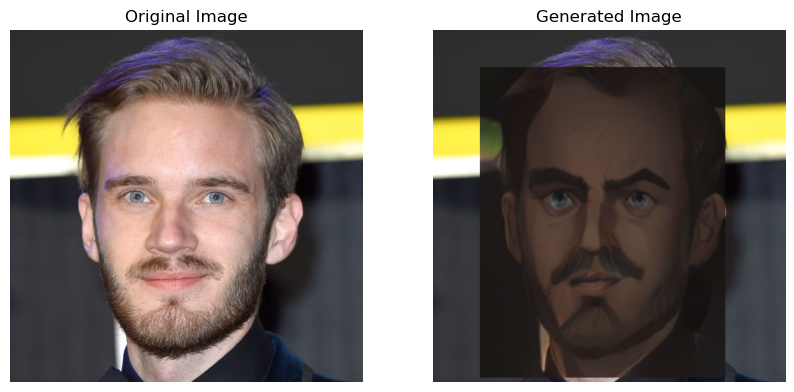

Saved translated image: ./10imgtest/output/Scarlett Johansson Black Widow Avengers.jpg


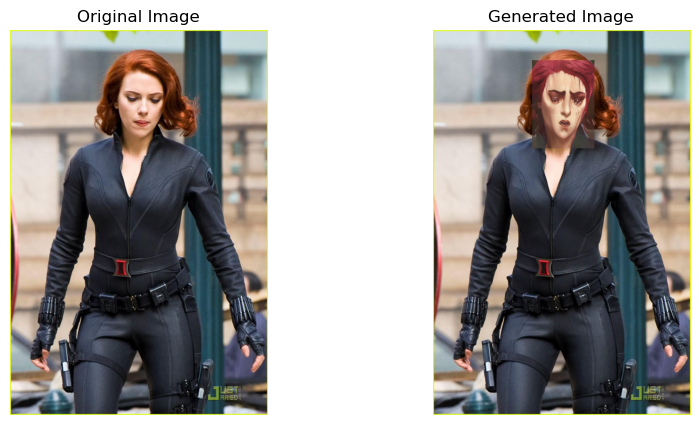

Saved translated image: ./10imgtest/output/unnamed.png


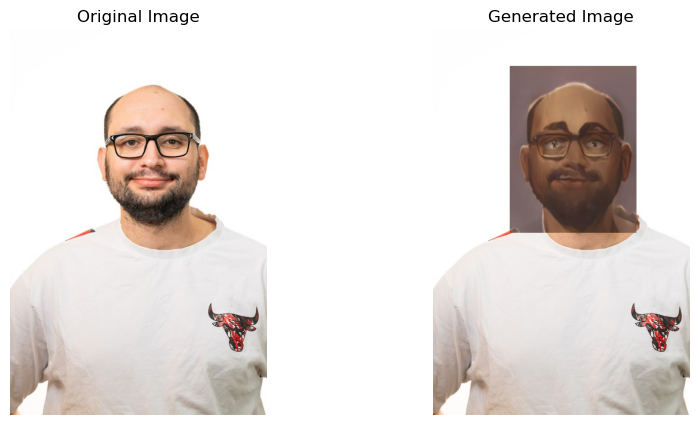

In [2]:
import os
import sys
import cv2
import torch
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
from options.test_options import TestOptions
from models import create_model
from facenet_pytorch import MTCNN
from IPython.display import display
import matplotlib.pyplot as plt

# ── 1) Parse TestOptions ─────────────────────────────────────────────────────
sys.argv = [
    'test.py',
    '--dataroot', './my_dataset',
    '--name', 'human2arcane',
    '--model', 'cycle_gan',
    '--phase', 'test',
    '--num_test', '50',
    '--load_size', '256',
    '--crop_size', '256',
    '--epoch', '200',
]
opt = TestOptions().parse()
model = create_model(opt)
model.setup(opt)
model.eval()

# ── 2) Preprocessing transform ───────────────────────────────────────────────
preprocess = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# ── 3) Face detector ─────────────────────────────────────────────────────────
mtcnn = MTCNN(keep_all=False)

# ── 4) Inference on image folder ─────────────────────────────────────────────
input_folder = './10imgtest/input/'
output_folder = './10imgtest/output/'
os.makedirs(output_folder, exist_ok=True)

for filename in os.listdir(input_folder):
    if not filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        continue

    image_path = os.path.join(input_folder, filename)
    try:
        img_pil_original = Image.open(image_path).convert('RGB')
        img_np_original = np.array(img_pil_original)
    except Exception as e:
        print(f"Error loading original image: {e}")
        continue

    img_pil = img_pil_original.copy() # Create a copy for processing
    boxes, _ = mtcnn.detect(img_pil)
    output = np.array(img_pil)

    if boxes is not None and len(boxes):
        h, w = output.shape[:2]
        box = boxes[0]
        x1, y1, x2, y2 = map(int, box)
        face_w, face_h = x2 - x1, y2 - y1

        expand_pct = 0.4
        pad_w = int(face_w * expand_pct / 2)
        pad_h = int(face_h * expand_pct / 2)

        x1_pad = max(0, x1 - pad_w)
        y1_pad = max(0, y1 - pad_h)
        x2_pad = min(w, x2 + pad_w)
        y2_pad = min(h, y2 + pad_h)

        face_crop = img_pil.crop((x1_pad, y1_pad, x2_pad, y2_pad))
        face_tensor = preprocess(face_crop).unsqueeze(0).to(model.device)

        with torch.no_grad():
            face_fake = model.netG_A(face_tensor)

        face_np = face_fake.squeeze().cpu().permute(1, 2, 0).numpy()
        face_img = ((face_np + 1) / 2 * 255).clip(0, 255).astype(np.uint8)

        # Resize and blend into original image
        face_bgr_resized = cv2.resize(face_img, (x2_pad - x1_pad, y2_pad - y1_pad))
        output[y1_pad:y2_pad, x1_pad:x2_pad] = face_bgr_resized

    out_path = os.path.join(output_folder, filename)
    cv2.imwrite(out_path, cv2.cvtColor(output, cv2.COLOR_RGB2BGR))
    print(f"Saved translated image: {out_path}")

    # Display images in the notebook
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img_np_original)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(output)  # Display the RGB 'output' directly
    plt.title("Generated Image")
    plt.axis('off')

    plt.show()

# Script for Live Inference

In [ ]:
import sys
import cv2
import torch
import numpy as np
from PIL import Image
import torchvision.transforms as transforms
from options.test_options import TestOptions
from models import create_model
from facenet_pytorch import MTCNN

# ── 1) Parse TestOptions ─────────────────────────────────────────────────────
sys.argv = [
    'test.py',
    '--dataroot', './my_dataset',
    '--name', 'human2arcane',
    '--model', 'cycle_gan',
    '--phase', 'test',
    '--num_test', '1',
    '--load_size', '256',
    '--crop_size', '256',
    '--epoch', '200',
]
opt = TestOptions().parse()
model = create_model(opt)
model.setup(opt)
model.eval()

# ── 2) Preprocessing transform ───────────────────────────────────────────────
preprocess = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# ── 3) Face detector ─────────────────────────────────────────────────────────
mtcnn = MTCNN(keep_all=False)

# ── 4) Sliders ───────────────────────────────────────────────────────────────
def nothing(x):
    pass

cv2.namedWindow('Controls')
cv2.createTrackbar('Contrast', 'Controls', 100, 300, nothing)   # 1.0–3.0
cv2.createTrackbar('Brightness', 'Controls', 100, 200, nothing) # -1.0–1.0
cv2.createTrackbar('Gamma', 'Controls', 100, 300, nothing)      # 0.1–3.0

# ── 5) Start webcam ──────────────────────────────────────────────────────────
cap = cv2.VideoCapture(0)
print("Press 'q' to quit.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    img_pil = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    boxes, _ = mtcnn.detect(img_pil)
    output = frame.copy()

    # Read slider values
    contrast_val = cv2.getTrackbarPos('Contrast', 'Controls') / 100.0  # 1.0–3.0
    brightness_val = (cv2.getTrackbarPos('Brightness', 'Controls') - 100) / 100.0  # -1.0 to 1.0
    gamma_val = cv2.getTrackbarPos('Gamma', 'Controls') / 100.0  # 0.1–3.0

    if boxes is not None and len(boxes):
        h, w = frame.shape[:2]
        box = boxes[0]
        x1, y1, x2, y2 = map(int, box)
        face_w, face_h = x2 - x1, y2 - y1

        expand_pct = 0.6
        pad_w = int(face_w * expand_pct / 2)
        pad_h = int(face_h * expand_pct / 2)

        x1_pad = max(0, x1 - pad_w)
        y1_pad = max(0, y1 - pad_h)
        x2_pad = min(w, x2 + pad_w)
        y2_pad = min(h, y2 + pad_h)

        # Crop face and apply contrast/brightness/gamma BEFORE inference
        face_crop = np.array(img_pil.crop((x1_pad, y1_pad, x2_pad, y2_pad))).astype(np.float32) / 255.0

        # Contrast and brightness
        face_crop = np.clip((face_crop - 0.5) * contrast_val + 0.5 + brightness_val, 0, 1)

        # Gamma correction
        face_crop = np.power(face_crop, 1.0 / max(gamma_val, 0.01))

        # Back to PIL for transforms
        face_crop = Image.fromarray((face_crop * 255).astype(np.uint8))

        # Preprocess for model
        face_tensor = preprocess(face_crop).unsqueeze(0).to(model.device)
        with torch.no_grad():
            face_fake = model.netG_A(face_tensor)

        face_np = face_fake.squeeze().cpu().permute(1, 2, 0).numpy()
        face_img = ((face_np + 1) / 2 * 255).clip(0, 255).astype(np.uint8)
        face_bgr = cv2.cvtColor(face_img, cv2.COLOR_RGB2BGR)

        target_w, target_h = x2_pad - x1_pad, y2_pad - y1_pad
        face_bgr_resized = cv2.resize(face_bgr, (target_w, target_h), interpolation=cv2.INTER_LINEAR)

        # Gaussian blending mask
        mask = np.zeros((target_h, target_w), dtype=np.float32)
        cv2.circle(mask, (target_w // 2, target_h // 2), min(target_w, target_h) // 2, 1.0, -1)
        mask = cv2.GaussianBlur(mask, (61, 61), 0)
        mask = np.expand_dims(mask, axis=2)
        mask = np.repeat(mask, 3, axis=2)

        roi = output[y1_pad:y2_pad, x1_pad:x2_pad]

        # Histogram alignment
        if roi.shape == face_bgr_resized.shape:
            face_lab = cv2.cvtColor(face_bgr_resized, cv2.COLOR_BGR2LAB).astype(np.float32)
            roi_lab = cv2.cvtColor(roi, cv2.COLOR_BGR2LAB).astype(np.float32)

            for c in range(3):
                roi_mean, roi_std = roi_lab[:, :, c].mean(), roi_lab[:, :, c].std()
                face_mean, face_std = face_lab[:, :, c].mean(), face_lab[:, :, c].std()
                face_std = face_std if face_std > 1e-6 else 1.0
                face_lab[:, :, c] = (face_lab[:, :, c] - face_mean) / face_std * roi_std + roi_mean
                face_lab[:, :, c] = np.clip(face_lab[:, :, c], 0, 255)

            face_bgr_resized = cv2.cvtColor(face_lab.astype(np.uint8), cv2.COLOR_LAB2BGR)

        blended = (mask * face_bgr_resized + (1 - mask) * roi).astype(np.uint8)
        output[y1_pad:y2_pad, x1_pad:x2_pad] = blended

    cv2.imshow('Human 2 Arcane Composite', output)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: ./my_dataset                  	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: 200                           	[default: latest]
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0          

# architecture (is default) 
